In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor  
import warnings
import pickle
import os
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [8]:
timeouts = [(0.5,2), (1, 2), (2,2), (0.5,3), (1,3), (2, 3), (3,3), (0.5,4), (1, 4), (2,4), (3,4), (4,4), (0.5,5), (1,5), (2,5), (3,5), (4,5), (5,5), (0.5, 30), (1, 30), (2,30), (3,30), (4,30), (5,30), (10, 30), (0.5, 60), (1, 60), (2,60), (3,60), (4,60), (5,60), (10, 60)]

In [3]:
import re

def extract_timeout_from_filename(filename):
    # Regular expression to find integers or floating-point numbers within parentheses
    match = re.search(r"\(([\d\.]+),\s*([\d\.]+)\)", filename)
    
    if match:
        # Return the result in the desired format
        return f"({match.group(1)}, {match.group(2)})"
    else:
        return None


# Load predictions - ET-BaslineFeatures

In [61]:
import json

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve

results = {}


tool = ['NFStream']
datasets = ['USTC-TF2016', 'CUPID', 'CIC-IDS2017', 'UNSW-NB15']
#featureSets = ['results', 'results_allFeatures', 'results_FS/FS_ET/30percent', 'results_FS/FS_ET/50percent']
featureSets = ['basicFeatures', 'allFeatures']
FeatureSelection = ['Checkpoints/featureSelection/30percent' 'Checkpoints/featureSelection/50percent']

models = ['ET', 'RF', 'MLP']

str_timemouts = []
for t in timeouts:
    t = str(t)
    str_timemouts.append(t)
    
df = pd.DataFrame(columns=str_timemouts)


print("Update with results of model-based performance")

for data in datasets:
    print("Dataset : ", data)
    for fset in featureSets:
        for model in models:
                path = f'/home/meryem.janati/lustre/nlp_team-um6p-st-sccs-id7fz1zvotk/IDS/janati/IDS/timeouts-IDS/NFStream/{data}/Checkpoints/{fset}/{model}/*'
                for file in glob.glob(path):
                    file_name = os.path.basename(file)
                    with open(file, 'r') as f:
                        loaded_results = json.load(f)
                        
                    f1 = loaded_results['Mean of all scores']['f1Mean']

                    timeout = str(extract_timeout_from_filename(file_name))
                    
                    if timeout in results:
                        results[timeout].append(f1)
                    else:
                        results[timeout] = [f1]
                    
                    #temp_row.append(f1)
                    #print(results)
                #df.loc[len(df.index)] = temp_row





Update with results of model-based performance
Dataset :  USTC-TF2016
Dataset :  CUPID
Dataset :  CIC-IDS2017
Dataset :  UNSW-NB15


In [63]:
df = pd.DataFrame(results)

In [64]:
df

,"(5, 60)","(3, 3)","(2, 2)","(3, 5)","(2, 4)","(1, 2)","(1, 4)","(3, 4)","(5, 5)","(10, 30)","(4, 60)","(4, 30)","(0.5, 30)","(0.5, 2)","(1, 60)","(0.5, 5)","(0.5, 3)","(2, 3)","(0.5, 60)","(0.5, 4)","(4, 4)","(2, 60)","(3, 30)","(1, 30)","(4, 5)","(2, 30)","(1, 3)","(2, 5)","(5, 30)","(1, 5)","(10, 60)","(3, 60)"
0,0.903230,0.906177,0.905728,0.906261,0.905729,0.903967,0.903785,0.906325,0.903789,0.914186,0.903174,0.905829,0.895457,0.895702,0.903652,0.895890,0.897502,0.904421,0.897044,0.895423,0.903827,0.905258,0.905844,0.905541,0.902631,0.903618,0.904445,0.906191,0.906943,0.903864,0.916076,0.905928
1,0.905140,0.905106,0.905995,0.905564,0.905218,0.904561,0.905039,0.906337,0.905317,0.916445,0.906002,0.905781,0.899416,0.899176,0.904561,0.898492,0.898642,0.905817,0.898365,0.898777,0.905652,0.905154,0.906711,0.905219,0.905969,0.904601,0.904857,0.905963,0.904928,0.904645,0.918153,0.904892
2,0.843344,0.835940,0.837846,0.839897,0.831194,0.833409,0.828955,0.840803,0.843726,0.851161,0.837446,0.833990,0.813931,0.836672,0.836476,0.821046,0.834156,0.840434,0.837509,0.822470,0.821241,0.827096,0.829518,0.838871,0.827948,0.845613,0.825095,0.821397,0.846000,0.829033,0.849764,0.853779
3,0.941103,0.941844,0.941473,0.941676,0.941344,0.937456,0.938120,0.941802,0.941585,0.953902,0.940555,0.941202,0.929293,0.929469,0.937699,0.928940,0.929080,0.941716,0.928791,0.928987,0.941610,0.940721,0.938658,0.937898,0.941752,0.940431,0.937431,0.940929,0.940579,0.937962,0.953269,0.941180
4,0.954092,0.954460,0.953555,0.954224,0.954604,0.950788,0.951577,0.955227,0.954605,0.967071,0.953716,0.954774,0.930133,0.930887,0.950957,0.930647,0.930797,0.954983,0.928807,0.930360,0.953658,0.953893,0.954670,0.951325,0.954330,0.953610,0.951769,0.953461,0.953263,0.950830,0.968087,0.954509
5,0.938064,0.925202,0.937744,0.930577,0.935301,0.934945,0.935522,0.935105,0.940192,0.942030,0.935963,0.935379,0.936451,0.920151,0.937284,0.925319,0.917538,0.934203,0.924441,0.917744,0.937867,0.933745,0.934412,0.936813,0.935732,0.941219,0.931512,0.933946,0.934649,0.938048,0.948725,0.933576
6,0.947376,0.949342,0.921288,0.946536,0.947510,0.919685,0.943639,0.949322,0.947417,0.947741,0.949256,0.949306,0.945004,0.942518,0.945687,0.944723,0.944763,0.929951,0.944709,0.944655,0.949290,0.948558,0.949188,0.922185,0.948226,0.948535,0.941386,0.947545,0.948304,0.932855,0.948627,0.949254
7,0.956120,0.957328,0.957636,0.956462,0.956758,0.952755,0.958651,0.957300,0.955431,0.956095,0.957214,0.951802,0.957277,0.958276,0.959123,0.957513,0.957221,0.953265,0.958031,0.958950,0.957286,0.956663,0.952655,0.958581,0.955601,0.957000,0.958279,0.957679,0.956300,0.958387,0.955805,0.957217
8,0.941587,0.946084,0.921808,0.938066,0.928547,0.918972,0.942738,0.921077,0.936989,0.915318,0.951020,0.933205,0.900315,0.948478,0.927974,0.941417,0.941841,0.920921,0.915577,0.917889,0.937118,0.949828,0.926289,0.945462,0.932709,0.939165,0.942594,0.924784,0.944257,0.942637,0.919915,0.945072
9,0.960112,0.960984,0.961880,0.960424,0.962267,0.962006,0.961139,0.961792,0.960731,0.963485,0.959675,0.962223,0.961752,0.961297,0.962345,0.960765,0.961237,0.958440,0.963342,0.960541,0.962326,0.961942,0.962496,0.961411,0.961068,0.961608,0.962664,0.961544,0.961049,0.962525,0.962773,0.961948


In [97]:
df.to_csv('stats_timeouts_revision.csv', index=False)

In [18]:
# df.columns = df.columns.str.replace(' ', '')

In [12]:
df.columns

Index(['(5, 60)', '(3, 3)', '(2, 2)', '(3, 5)', '(2, 4)', '(1, 2)', '(1, 4)',
       '(3, 4)', '(5, 5)', '(10, 30)', '(4, 60)', '(4, 30)', '(0.5, 30)',
       '(0.5, 2)', '(1, 60)', '(0.5, 5)', '(0.5, 3)', '(2, 3)', '(0.5, 60)',
       '(0.5, 4)', '(4, 4)', '(2, 60)', '(3, 30)', '(1, 30)', '(4, 5)',
       '(2, 30)', '(1, 3)', '(2, 5)', '(5, 30)', '(1, 5)', '(10, 60)',
       '(3, 60)'],
      dtype='object')

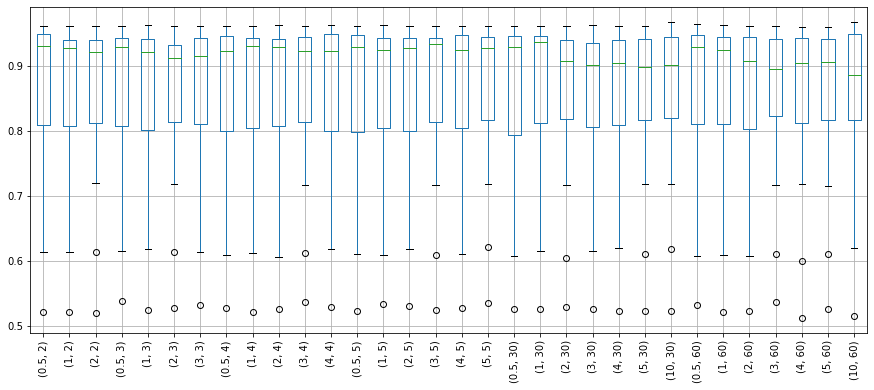

In [13]:

cols = df.columns
plt.figure(figsize=(15, 6))
df.boxplot(column = [str(col) for col in timeouts], figsize=(20, 10))
# Set rotation for x-axis labels to vertical (90 degrees)
plt.xticks(rotation=90)
plt.savefig("boxplot_f1score.pdf", format="pdf", bbox_inches="tight")
plt.show()

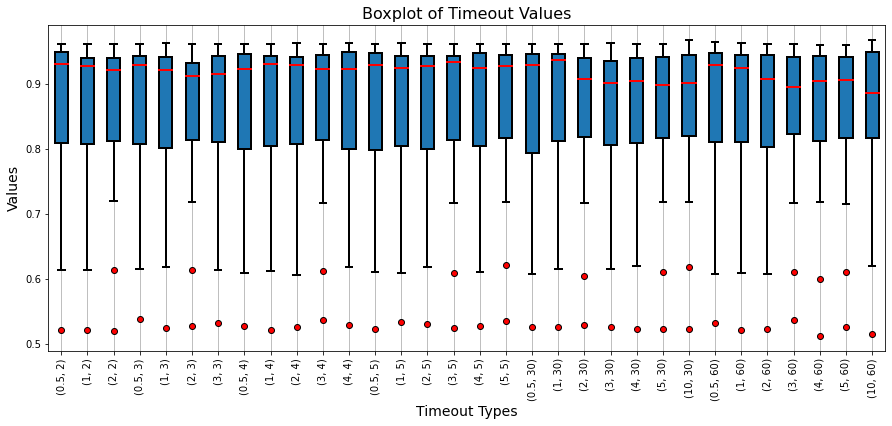

In [52]:
import matplotlib.pyplot as plt

# Assuming 'timeouts' is already defined
plt.figure(figsize=(15, 6))


boxplot = df.boxplot(column=[str(col) for col in timeouts], 
                      figsize=(20, 10), 
                      boxprops=dict(color='black', linewidth=2),  # Filled with light blue, dark blue outline
                      medianprops=dict(color='red', linewidth=2),  # Orange for median line
                      whiskerprops=dict(color='black', linewidth=2),  # Dark blue for whiskers
                      capprops=dict(color='black', linewidth=2),  # Dark blue for caps
                      flierprops=dict(markerfacecolor='red', marker='o'),
                      patch_artist=True)  # Red for outliers

# Set rotation for x-axis labels to vertical (90 degrees)
plt.xticks(rotation=90)

# Add title and labels
plt.title("Boxplot of Timeout Values", fontsize=16)
plt.xlabel("Timeout Types", fontsize=14)
plt.ylabel("Values", fontsize=14)

# Add grid for better readability
plt.grid(axis='y')

# Save the figure
plt.savefig("boxplot_f1score_filled.pdf", format="pdf", bbox_inches="tight")
plt.show()


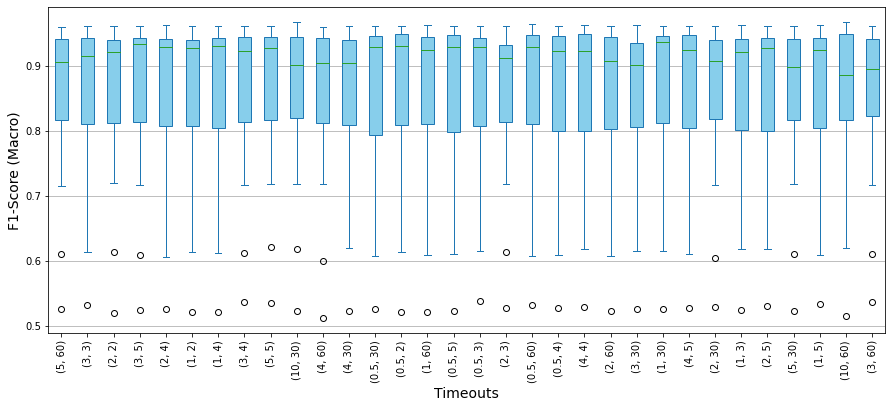

In [70]:
import matplotlib.pyplot as plt


fig,ax = plt.subplots(figsize=(15,6)) 
ax,props = df.plot.box(patch_artist=True, return_type='both', ax=ax)
for patch in props['boxes']:
    patch.set_facecolor('skyblue')

# Set rotation for x-axis labels to vertical (90 degrees)
plt.xticks(rotation=90)

# Add title and labels
#plt.title("Boxplot of Timeout Values", fontsize=16)
plt.xlabel("Timeouts", fontsize=14)
plt.ylabel("F1-Score (Macro)", fontsize=14)

# Add grid for better readability
plt.grid(axis='y')

# Save the figure
plt.savefig("boxplot_f1score_filled.pdf", format="pdf", bbox_inches="tight")
plt.show()
